In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
from pathlib import Path
import gc

# ── CONFIGURE THESE ──────────────────────────────────────────────
FILES = [
    "df_count_1.csv", 
    "df_count_2_part1.csv", 
    "df_count_2_part2.csv", 
    "df_count_3_part1.csv", 
    "df_count_3_part2.csv", 
    "df_count_4.csv"
]  # List of new chunk files
OUT_FILE_NO_EVENT = Path("without_event.csv")  # Output file for MAIs without the event
ENTER_ALGERIA_EVENT = "Recevoir envoi au bureau d'échange (Ent)"  # Event to filter by
# ─────────────────────────────────────────────────────────────────

# Start fresh (delete old result if it exists)
OUT_FILE_NO_EVENT.unlink(missing_ok=True)

# Track total unique counts across all files
total_with_event = 0
total_no_event = 0
total_all_mais = 0

for src in FILES:
    print(f"→ reading {src}")

    # 1) Read the whole file (or stream in chunks if the CSVs are huge)
    df = pd.read_csv(src)

    # 2) Identify the unique MAILITM_FID values with and without the specified event
    ma_with_event = df[df["EVENT_TYPE_NM"] == ENTER_ALGERIA_EVENT]["MAILITM_FID"].unique()
    ma_without_event = df[~df["MAILITM_FID"].isin(ma_with_event)]["MAILITM_FID"].unique()

    # 3) Calculate unique MAILITM_FID counts for this file
    unique_with_event = len(ma_with_event)
    unique_no_event = len(ma_without_event)
    total_mais_in_file = df["MAILITM_FID"].nunique()

    # Add to the totals
    total_with_event += unique_with_event
    total_no_event += unique_no_event
    total_all_mais += total_mais_in_file

    # Print unique counts for this file
    print(f"File: {src}")
    print(f"  Unique MAIs with event: {unique_with_event}")
    print(f"  Unique MAIs without event: {unique_no_event}")
    print(f"  Total unique MAIs in this file: {total_mais_in_file}")

    # 4) Filter the rows based on whether they have the event or not
    # Only save rows without the event to output file
    df_without_event = df[df["MAILITM_FID"].isin(ma_without_event)]

    # 5) Append only the rows without the event to the output CSV
    df_without_event.to_csv(OUT_FILE_NO_EVENT, mode="a", header=not OUT_FILE_NO_EVENT.exists(), index=False)

    # 6) Drop references to free memory before next loop
    del df, df_without_event
    gc.collect()

# Final Output of Counts
print("\n✓ All files processed")
print(f"Total unique MAIs with the event: {total_with_event}")
print(f"Total unique MAIs without the event: {total_no_event}")
print(f"Total unique MAIs across all files: {total_all_mais}")
print(f"Result without event saved to: {OUT_FILE_NO_EVENT.resolve()}")


→ reading df_count_1.csv
File: df_count_1.csv
  Unique MAIs with event: 56490
  Unique MAIs without event: 10591
  Total unique MAIs in this file: 67081
→ reading df_count_2_part1.csv
File: df_count_2_part1.csv
  Unique MAIs with event: 823103
  Unique MAIs without event: 5326
  Total unique MAIs in this file: 828429
→ reading df_count_2_part2.csv
File: df_count_2_part2.csv
  Unique MAIs with event: 825372
  Unique MAIs without event: 3057
  Total unique MAIs in this file: 828429
→ reading df_count_3_part1.csv
File: df_count_3_part1.csv
  Unique MAIs with event: 1057177
  Unique MAIs without event: 1312
  Total unique MAIs in this file: 1058489
→ reading df_count_3_part2.csv
File: df_count_3_part2.csv
  Unique MAIs with event: 1054696
  Unique MAIs without event: 3793
  Total unique MAIs in this file: 1058489
→ reading df_count_4.csv
File: df_count_4.csv
  Unique MAIs with event: 726685
  Unique MAIs without event: 3980
  Total unique MAIs in this file: 730665

✓ All files processed
To

In [2]:
import pandas as pd
import gc

# ── CONFIGURE THESE ──────────────────────────────────────────────
FILES = [
    "df_count_1.csv", 
    "df_count_2_part1.csv", 
    "df_count_2_part2.csv", 
    "df_count_3_part1.csv", 
    "df_count_3_part2.csv", 
    "df_count_4.csv"
]  # List of new chunk files
ENTER_ALGERIA_EVENT = "Recevoir envoi au bureau d'échange (Ent)"  # Event to filter by
# ─────────────────────────────────────────────────────────────────

# Track total unique counts across all files
event_count_stats = {}

for src in FILES:
    # 1) Read the whole file
    df = pd.read_csv(src)

    # 2) Filter rows that contain the specific event
    df_with_event = df[df["EVENT_TYPE_NM"] == ENTER_ALGERIA_EVENT]

    # 3) Count the occurrences of the event for each MAILITM_FID
    event_counts = df_with_event["MAILITM_FID"].value_counts()

    # 4) Calculate how many MAIs have the event 1 time, 2 times, etc.
    occurrence_counts = event_counts.value_counts().sort_index()

    # 5) Add to the event_count_stats dictionary
    for count, occurrences in occurrence_counts.items():
        if count not in event_count_stats:
            event_count_stats[count] = 0
        event_count_stats[count] += occurrences

    # 6) Print the results for the current file
    print(f"File: {src}")
    for count, occurrences in occurrence_counts.items():
        print(f"  {occurrences} MAIs have the event {count} times")

    # 7) Drop references to free memory before next loop
    del df, df_with_event, event_counts, occurrence_counts
    gc.collect()

# Final Output of Counts
print("\n✓ All files processed")

# Print the total results across all files
print("Total results for all files:")
for count, total_occurrences in event_count_stats.items():
    print(f"  {total_occurrences} MAIs have the event {count} times")


File: df_count_1.csv
  54416 MAIs have the event 1 times
  2064 MAIs have the event 2 times
  10 MAIs have the event 3 times
File: df_count_2_part1.csv
  766746 MAIs have the event 1 times
  55496 MAIs have the event 2 times
  793 MAIs have the event 3 times
  53 MAIs have the event 4 times
  7 MAIs have the event 5 times
  4 MAIs have the event 6 times
  3 MAIs have the event 7 times
  1 MAIs have the event 10 times
File: df_count_2_part2.csv
  779760 MAIs have the event 1 times
  44904 MAIs have the event 2 times
  647 MAIs have the event 3 times
  46 MAIs have the event 4 times
  5 MAIs have the event 5 times
  3 MAIs have the event 6 times
  5 MAIs have the event 7 times
  2 MAIs have the event 9 times
File: df_count_3_part1.csv
  1034491 MAIs have the event 1 times
  22498 MAIs have the event 2 times
  176 MAIs have the event 3 times
  8 MAIs have the event 4 times
  2 MAIs have the event 5 times
  1 MAIs have the event 6 times
  1 MAIs have the event 7 times
File: df_count_3_part

In [2]:
import pandas as pd
import gc
from pathlib import Path

# ── CONFIGURE THESE ──────────────────────────────────────────────
FILES = [
    "df_count_1.csv", 
    "df_count_2_part1.csv", 
    "df_count_2_part2.csv", 
    "df_count_3_part1.csv", 
    "df_count_3_part2.csv", 
    "df_count_4.csv"
]  # List of new chunk files
OUT_FILE_WITH_EVENT_COUNT_2_OR_MORE = Path("with_event_count_2_or_more.csv")  # Corrected to Path object
ENTER_ALGERIA_EVENT = "Recevoir envoi au bureau d'échange (Ent)"  # Event to filter by
# ─────────────────────────────────────────────────────────────────

# Start fresh (delete old result if it exists)
OUT_FILE_WITH_EVENT_COUNT_2_OR_MORE.unlink(missing_ok=True)  # This will now work as OUT_FILE is a Path object

# Track total unique counts across all files
total_with_event_count_2_or_more = 0

for src in FILES:
    print(f"→ reading {src}")

    # 1) Read the whole file
    df = pd.read_csv(src)

    # 2) Filter rows that contain the specific event
    df_with_event = df[df["EVENT_TYPE_NM"] == ENTER_ALGERIA_EVENT]

    # 3) Count the occurrences of the event for each MAILITM_FID
    event_counts = df_with_event["MAILITM_FID"].value_counts()

    # 4) Get MAILITM_FID values where the event appears >= 2 times
    ma_with_event_count_2_or_more = event_counts[event_counts >= 2].index

    # 5) Filter all rows for these MAIs
    df_with_event_count_2_or_more = df[df["MAILITM_FID"].isin(ma_with_event_count_2_or_more)]

    # 6) Append to the output CSV
    df_with_event_count_2_or_more.to_csv(OUT_FILE_WITH_EVENT_COUNT_2_OR_MORE, mode="a", header=not OUT_FILE_WITH_EVENT_COUNT_2_OR_MORE.exists(), index=False)

    # 7) Update the total count of MAIs with >= 2 events
    total_with_event_count_2_or_more += len(ma_with_event_count_2_or_more)

    # 8) Drop references to free memory before next loop
    del df, df_with_event, event_counts, ma_with_event_count_2_or_more, df_with_event_count_2_or_more
    gc.collect()

# Final Output of Counts
print("\n✓ All files processed")
print(f"Total unique MAIs with >= 2 events: {total_with_event_count_2_or_more}")
print(f"Result saved to: {OUT_FILE_WITH_EVENT_COUNT_2_OR_MORE}")


→ reading df_count_1.csv
→ reading df_count_2_part1.csv
→ reading df_count_2_part2.csv
→ reading df_count_3_part1.csv
→ reading df_count_3_part2.csv
→ reading df_count_4.csv

✓ All files processed
Total unique MAIs with >= 2 events: 186713
Result saved to: with_event_count_2_or_more.csv


In [2]:
 
df = pd.read_csv("with_event_count_2_or_more.csv" , parse_dates=["date"])


In [3]:
df.shape

(2205446, 9)

In [6]:
df.head(50)

,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id,duration_to_next_step,total_duration
0,CB364592936US,Réception d'envoi du client (Srt),2025-01-21 11:56:00,ÉTATS-UNIS,1,NaN,US,27 days 20:53:36,29 days 22:45:01
1,CB364592936US,Recevoir envoi au bureau d'échange (Ent),2025-02-18 08:49:36,ALGER COLIS POSTAUX,30,NaN,US,0 days 00:22:02,29 days 22:45:01
2,CB364592936US,Expédier envoi à adresse nationale (Ent),2025-02-18 09:11:38,ALGER COLIS POSTAUX,35,ALGER COLIS POSTAUX,US,0 days 05:19:30,29 days 22:45:01
3,CB364592936US,Recevoir envoi au bureau d'échange (Ent),2025-02-18 14:31:08,ALGER GARE,30,NaN,US,0 days 00:00:08,29 days 22:45:01
4,CB364592936US,Expédier envoi à adresse nationale (Ent),2025-02-18 14:31:16,ALGER GARE,35,MAHELMA,US,0 days 19:38:34,29 days 22:45:01
5,CB364592936US,Recevoir envoi au bureau de livraison (Ent),2025-02-19 10:09:50,MAHELMA,32,NaN,US,0 days 00:02:15,29 days 22:45:01
6,CB364592936US,Vaine tentative de livraison d'envoi (Ent),2025-02-19 10:12:05,MAHELMA,36,NaN,US,0 days 00:00:24,29 days 22:45:01
7,CB364592936US,Transmettre envoi à l'agent de livraison (Ent),2025-02-19 10:12:29,MAHELMA,39,NaN,US,1 days 00:28:32,29 days 22:45:01
8,CB364592936US,Livraison d'envoi (Ent),2025-02-20 10:41:01,MAHELMA,37,NaN,US,NaN,29 days 22:45:01
9,CC087444892NL,Recevoir envoi au bureau d'échange (Ent),2021-07-17 10:31:41,ALGER COLIS POSTAUX,30,NaN,NL,0 days 00:05:38,248 days 10:35:19


In [2]:
import pandas as pd
import gc
from pathlib import Path

# ── CONFIGURE THESE ──────────────────────────────────────────────
FILES = [
    "df_count_1.csv", 
    "df_count_2_part1.csv", 
    "df_count_2_part2.csv", 
    "df_count_3_part1.csv", 
    "df_count_3_part2.csv", 
    "df_count_4.csv"
]  # List of new chunk files
ENTER_ALGERIA_EVENT = "Recevoir envoi au bureau d'échange (Ent)"  # Event to filter by
OUT_FILE = "final_dataset.csv"  # Output file name
# ─────────────────────────────────────────────────────────────────

# Start fresh (delete old result if it exists)
OUT_FILE_PATH = Path(OUT_FILE)
OUT_FILE_PATH.unlink(missing_ok=True)

# Track total unique counts across all files
final_data = []

for src in FILES:
    print(f"→ reading {src}")

    # 1) Read the whole file (or stream in chunks if the CSVs are huge)
    df = pd.read_csv(src)

    # 2) Filter rows that contain the specific event
    df_with_event = df[df["EVENT_TYPE_NM"] == ENTER_ALGERIA_EVENT]

    # 3) Remove duplicate occurrences for each `MAILITM_FID` by keeping the first occurrence
    df_with_event_first_occurrence = df_with_event.drop_duplicates(subset=["MAILITM_FID"], keep="first")

    # 4) Format the `date` to retain only year, month, and day using `.loc` to avoid the warning
    df_with_event_first_occurrence.loc[:, "date"] = pd.to_datetime(df_with_event_first_occurrence["date"]).dt.strftime("%Y-%m-%d")

    # 5) Select only `id` and `date` columns, excluding `MAILITM_FID`
    final_data.append(df_with_event_first_occurrence[["id", "date"]])

    # 6) Drop references to free memory before next loop
    del df, df_with_event, df_with_event_first_occurrence
    gc.collect()

# Combine the data from all files into one DataFrame
final_df = pd.concat(final_data, ignore_index=True)

# 7) Save the resulting dataset to a CSV file
final_df.to_csv(OUT_FILE, index=False)

# Final Output of Counts
print("\n✓ All files processed")
print(f"Result saved to: {OUT_FILE}")


→ reading df_count_1.csv
→ reading df_count_2_part1.csv
→ reading df_count_2_part2.csv
→ reading df_count_3_part1.csv
→ reading df_count_3_part2.csv
→ reading df_count_4.csv

✓ All files processed
Result saved to: final_dataset.csv


In [2]:
 
df = pd.read_csv("final_dataset.csv" , parse_dates=["date"])


In [7]:
df.shape

(4543523, 3)

In [4]:
df.head()

,id,date
0,US,2025-02-16
1,US,2025-04-08
2,JE,2025-03-11
3,JE,2025-05-13
4,JE,2025-05-13


In [5]:
print("Min date:", df["date"].min())
print("Max date:", df["date"].max())

Min date: 2017-03-13 00:00:00
Max date: 2025-05-21 00:00:00


In [6]:
# Assuming 'df' is your final_dataset DataFrame

# Convert 'date' to datetime if it's not already in that format
df["date"] = pd.to_datetime(df["date"])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by 'year' and count the number of unique packages (id) for each year
package_counts_per_year = df.groupby('year')['id'].nunique()

# Print the number of packages per year
print("Number of packages per year:")
print(package_counts_per_year)


Number of packages per year:
year
2017      1
2019      2
2020      7
2021     31
2022    124
2023    128
2024    122
2025    100
Name: id, dtype: int64


In [8]:
# Assuming 'df' is your final_dataset DataFrame

# Rename 'id' to 'country'
df.rename(columns={'id': 'country'}, inplace=True)

# Convert 'date' to datetime if it's not already in that format
df["date"] = pd.to_datetime(df["date"])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by 'year' and count the total number of rows (total number of packages) for each year
package_counts_per_year = df.groupby('year').size()

# Print the total number of packages per year
print("Number of packages per year:")
print(package_counts_per_year)


Number of packages per year:
year
2017          1
2019         12
2020         18
2021        166
2022    1069186
2023    1757632
2024    1421584
2025     294924
dtype: int64


In [9]:
df.to_csv("final_dataset_with_country.csv", index=False)

print(f"Dataset saved as 'final_dataset_with_country.csv'")

Dataset saved as 'final_dataset_with_country.csv'


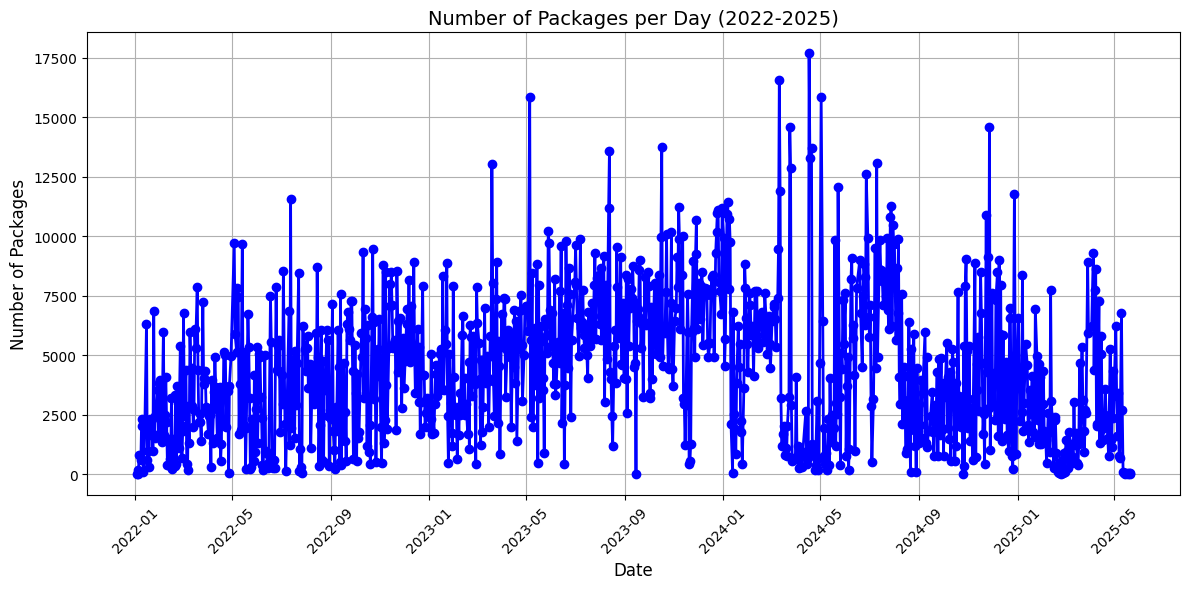

In [11]:

df = df[df['date'].dt.year >= 2022]

# Group by the 'date' and count the number of rows (total packages) for each day
package_counts_per_day = df.groupby('date').size()

# Plot the time series for the number of packages per day for 2022 to 2025
plt.figure(figsize=(12, 6))
plt.plot(package_counts_per_day.index, package_counts_per_day.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Number of Packages per Day (2022-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Packages', fontsize=12)
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid cutting off any labels
plt.show()


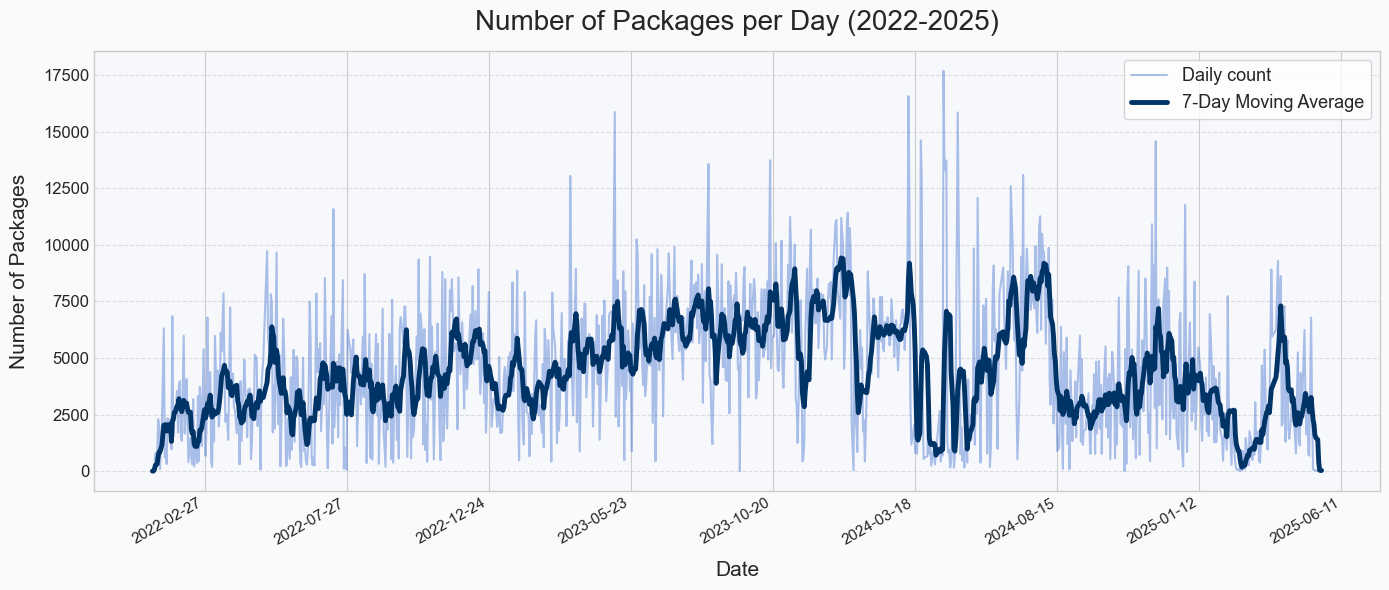

In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  # keep the nice grid

fig, ax = plt.subplots(figsize=(14, 6))

# Stronger blue for daily counts, less transparent
ax.plot(package_counts_per_day.index, package_counts_per_day.values, 
        color='#3366cc', alpha=0.4, label='Daily count')

# Dark, thick rolling average
ax.plot(rolling.index, rolling.values, 
        color='#003366', linewidth=3.5, label='7-Day Moving Average')

ax.set_title("Number of Packages per Day (2022-2025)", fontsize=20, pad=15)
ax.set_xlabel("Date", fontsize=15, labelpad=10)
ax.set_ylabel("Number of Packages", fontsize=15, labelpad=10)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=12)

ax.legend(fontsize=13, loc='upper right', frameon=True)
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
fig.patch.set_facecolor('#FAFAFA')
ax.set_facecolor('#F6F8FC')

plt.tight_layout()
plt.show()


In [15]:

all_days = pd.date_range(package_counts_per_day.index.min(), package_counts_per_day.index.max(), freq='D')
full_counts = package_counts_per_day.reindex(all_days, fill_value=0)

# Compute the number of zero-package days per year
zero_counts_per_year = full_counts.groupby(full_counts.index.year).apply(lambda x: (x == 0).sum())

# Create and display as a DataFrame
zero_table = pd.DataFrame({
    "year": zero_counts_per_year.index,
    "zero_package_days": zero_counts_per_year.values
})

print(zero_table)


   year  zero_package_days
0  2022                 63
1  2023                 61
2  2024                 62
3  2025                 26


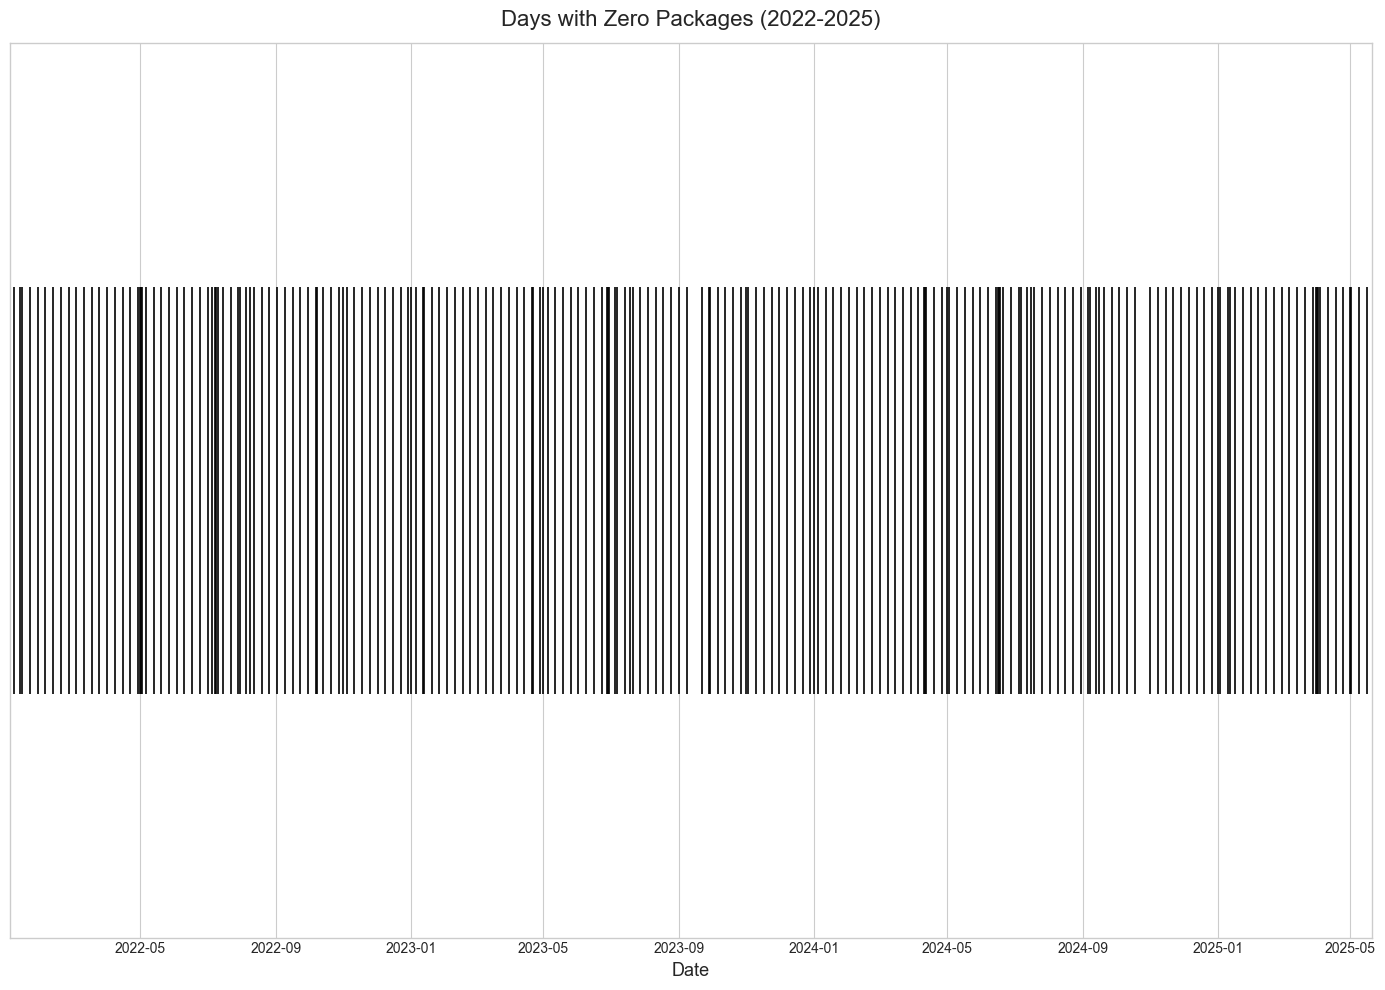

In [17]:


# Get all dates with zero packages
zero_days = full_counts[full_counts == 0].index

plt.figure(figsize=(14, 10))
plt.eventplot(zero_days, orientation='horizontal', colors='black', linewidths=1.2)
plt.xlim(full_counts.index.min(), full_counts.index.max())
plt.title("Days with Zero Packages (2022-2025)", fontsize=16, pad=12)
plt.xlabel("Date", fontsize=13)
plt.yticks([])
plt.tight_layout()
plt.show()


In [18]:

zero_days = full_counts[full_counts == 0].index

# Day-of-week for each zero day (Monday=0, ..., Sunday=6)
dow = zero_days.dayofweek

# Count Fridays (4), Saturdays (5), others
friday_count = (dow == 4).sum()
saturday_count = (dow == 5).sum()
other_count = ((dow != 4) & (dow != 5)).sum()
total_zeros = len(zero_days)

print(f"Total zero-package days: {total_zeros}")
print(f"Fridays:   {friday_count}  ({friday_count/total_zeros:.1%})")
print(f"Saturdays: {saturday_count}  ({saturday_count/total_zeros:.1%})")
print(f"Other days:{other_count}  ({other_count/total_zeros:.1%})")


Total zero-package days: 212
Fridays:   174  (82.1%)
Saturdays: 5  (2.4%)
Other days:33  (15.6%)


In [19]:
# Get non-Friday zero-package days
other_zero_days = zero_days[(zero_days.dayofweek != 4)]


In [20]:
holidays = [
    # Eid al-Fitr
    '2022-05-02', '2023-04-21', '2024-04-10', '2025-03-31',
    # (Optionally add 2025-04-01 for public holiday)
    # Eid al-Adha
    '2022-07-09', '2023-06-28', '2024-06-17', '2025-06-06',
    # (Optionally add 2025-06-07 for public holiday)
    # Islamic New Year
    '2022-07-30', '2023-07-19', '2024-07-07', '2025-06-26',
    # Mawlid (Prophet’s Birthday)
    '2022-10-08', '2023-09-27', '2024-09-15', '2025-09-04',
    # Independence Day
    '2022-07-05', '2023-07-05', '2024-07-05', '2025-07-05',
    # Labor Day
    '2022-05-01', '2023-05-01', '2024-05-01', '2025-05-01',
    # Revolution Day
    '2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01',
    # New Year
    '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01',
    # Yennayer (Amazigh New Year)
    '2022-01-12', '2023-01-12', '2024-01-12', '2025-01-12',
]

holidays = pd.to_datetime(holidays)

In [21]:
# Find which non-Friday zero-package days are holidays
holiday_zero_days = other_zero_days[other_zero_days.isin(holidays)]
non_holiday_zero_days = other_zero_days[~other_zero_days.isin(holidays)]

print(f"Non-Friday zero-package days: {len(other_zero_days)}")
print(f"  ...of which are holidays:   {len(holiday_zero_days)}")
print(f"  ...of which are not holidays: {len(non_holiday_zero_days)}")


Non-Friday zero-package days: 38
  ...of which are holidays:   24
  ...of which are not holidays: 14


In [22]:
# non_holiday_zero_days is the 14 days you want to print
# If not defined, run this before:
# non_holiday_zero_days = other_zero_days[~other_zero_days.isin(holidays)]

print("Non-Friday, non-holiday zero-package days:")
for d in non_holiday_zero_days:
    print(d.strftime('%Y-%m-%d'))


Non-Friday, non-holiday zero-package days:
2022-05-03
2022-07-10
2022-08-08
2023-04-22
2023-06-29
2023-09-28
2024-04-11
2024-06-16
2024-06-18
2024-07-16
2024-09-07
2024-09-16
2025-04-01
2025-04-02


## Analysis of Non-Friday, Non-Holiday Zero-Package Days

Below are the 14 days (2022–2025) when there were zero packages, which are **not Fridays and not official Algerian holidays**:

| Date         | Relation to Holidays                  | Likely Cause        |
|--------------|--------------------------------------|---------------------|
| 2022-05-03   | After Eid al-Fitr                    | Extended closure    |
| 2022-07-10   | After Eid al-Adha                    | Extended closure    |
| 2022-08-08   | None                                 | Unknown/anomaly     |
| 2023-04-22   | After Eid al-Fitr                    | Extended closure    |
| 2023-06-29   | After Eid al-Adha                    | Extended closure    |
| 2023-09-28   | After Mawlid                         | Extended closure    |
| 2024-04-11   | After Eid al-Fitr                    | Extended closure    |
| 2024-06-16   | Before Eid al-Adha                   | Pre-holiday break?  |
| 2024-06-18   | After Eid al-Adha                    | Extended closure    |
| 2024-07-16   | None                                 | Unknown/anomaly     |
| 2024-09-07   | None                                 | Unknown/anomaly     |
| 2024-09-16   | After Mawlid                         | Extended closure    |
| 2025-04-01   | After Eid al-Fitr                    | Extended closure    |
| 2025-04-02   | 2 days after Eid al-Fitr             | Extended closure    |

### Interpretation

- **Most of these days directly follow major holidays** (Eid al-Fitr, Eid al-Adha, Mawlid), indicating likely extended closures.
- A few days (e.g., 2022-08-08, 2024-07-16, 2024-09-07) do **not** coincide with national holidays and may be due to local events, random gaps, or data collection issues.
- **In summary:**  
  The vast majority of unexplained zero-package days are explainable by holiday-related operational breaks, with only a handful likely representing anomalies or unrecorded closures.
